In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns 
plt.style.use('seaborn')

/tmp/ipykernel_43134/209906845.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
data=pd.read_csv("/home/chiku/Desktop/datasets/Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### The 'customer_id' column has no relevence therefore deleting it would be better.
Deleting 'customer_id' colummn using drop().



In [19]:
data=data.drop('CustomerID',axis=1)

In [21]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


The 'Annual income' and 'Spending score' columns have spaces in their column names, we need to rename them.

Cleaning the data labels (Annual income and Spending Score) using rename().



In [22]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()


,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [24]:
corr=data.corr()
corr

/tmp/ipykernel_43134/2248884307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


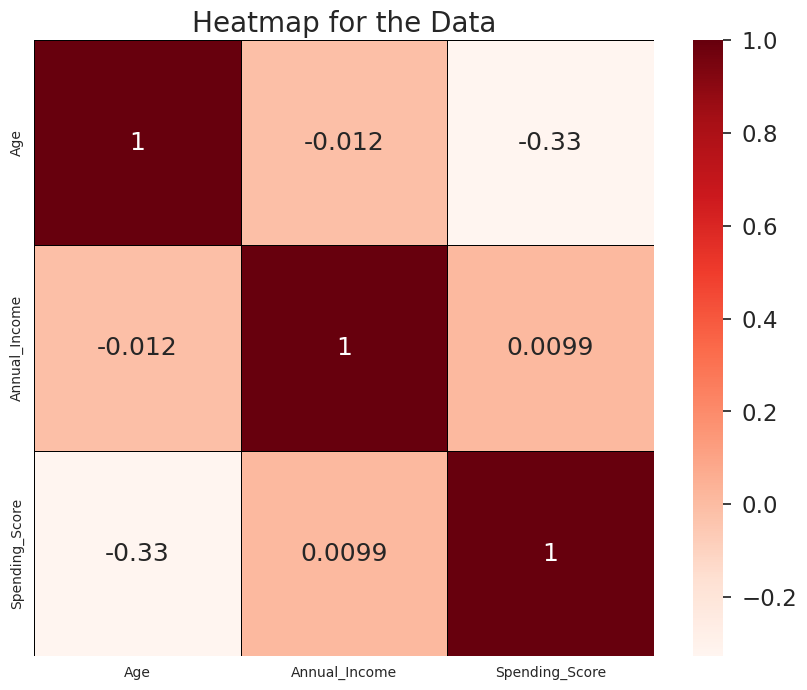

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()



In [26]:
data['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [28]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

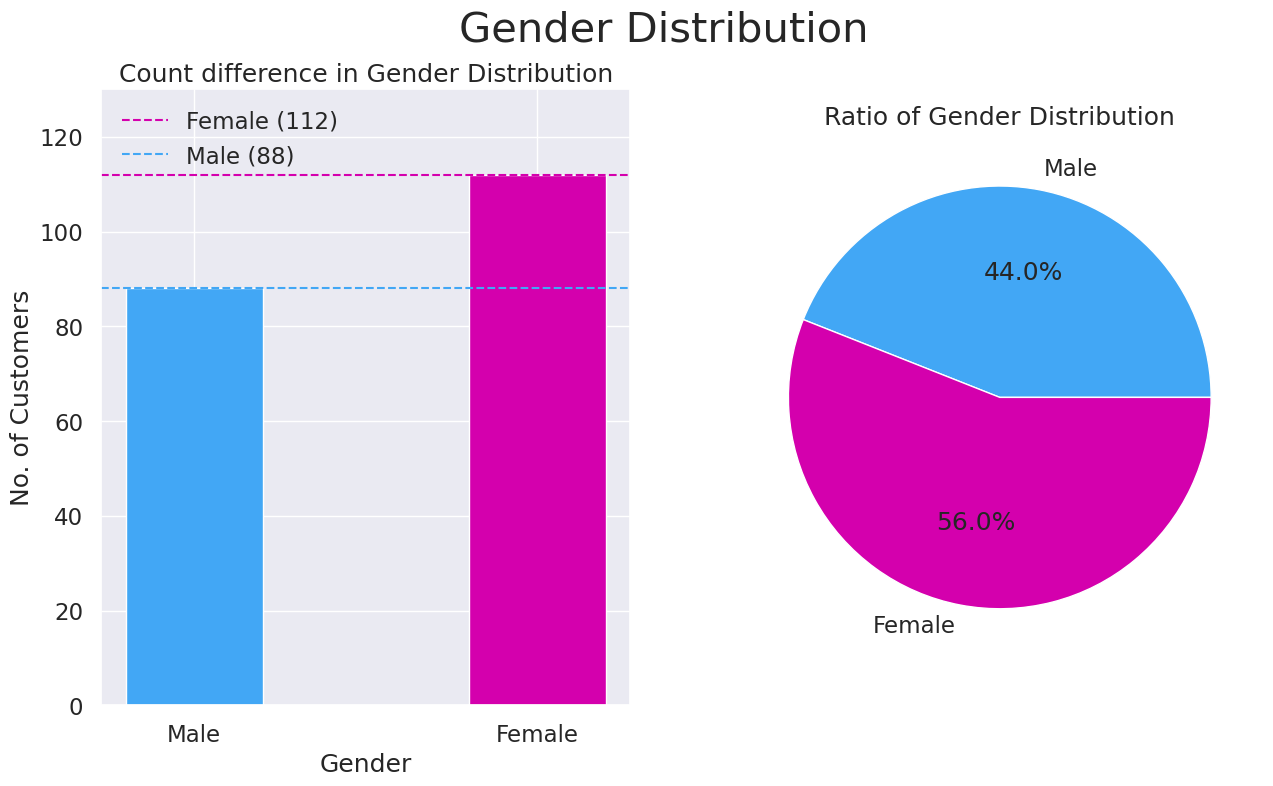

In [30]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()

ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

In [32]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [33]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

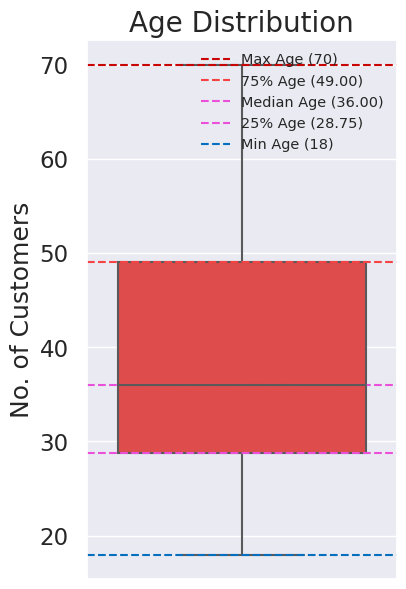

In [36]:
fig, ax = plt.subplots(figsize=(4,7))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

In [38]:
data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

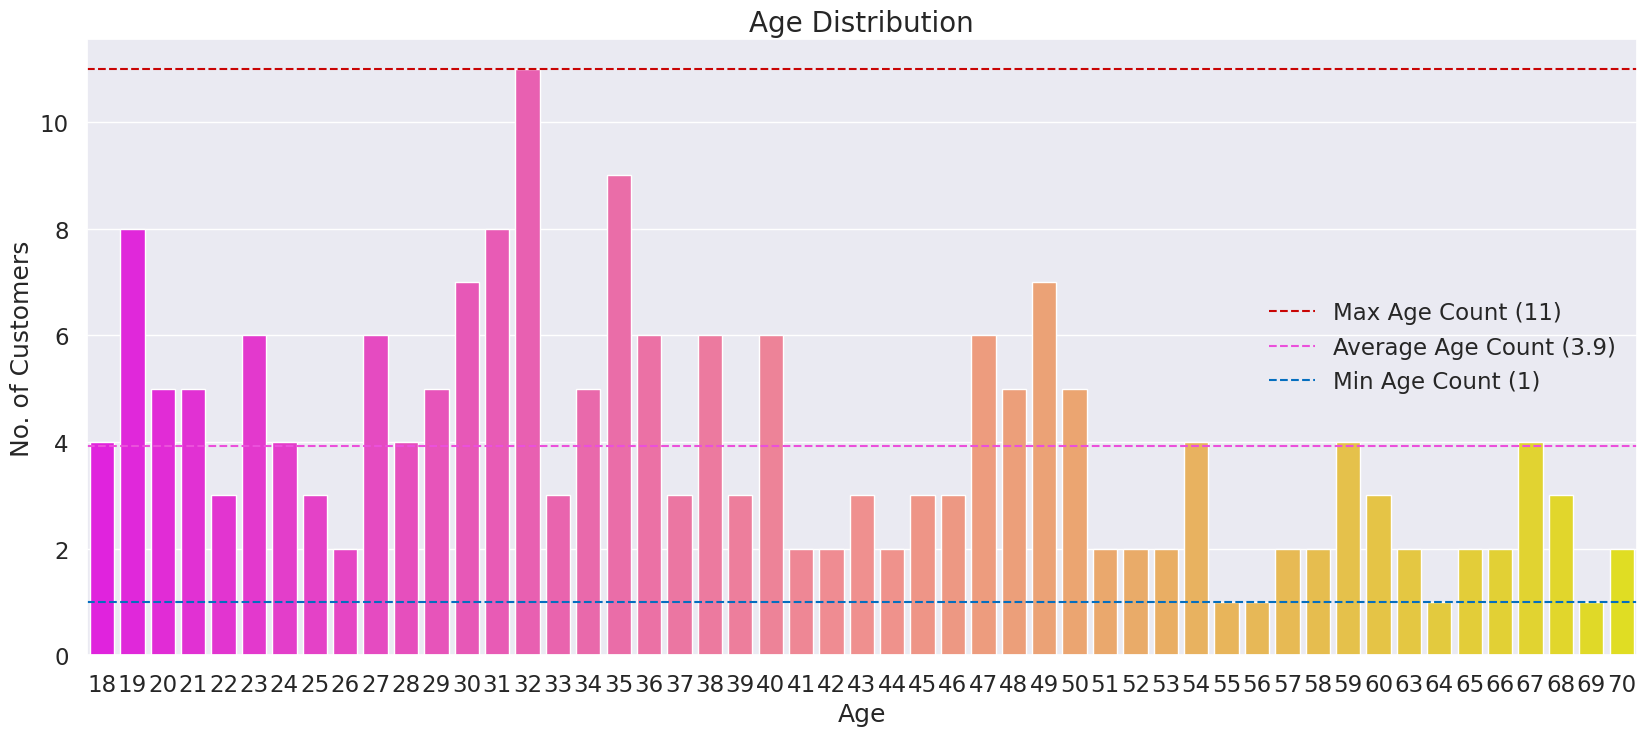

In [39]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

### Gender wise Age Distribution



In [40]:
data[data['Gender']=='Male']['Age'].describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [41]:
data[data['Gender']=='Female']['Age'].describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

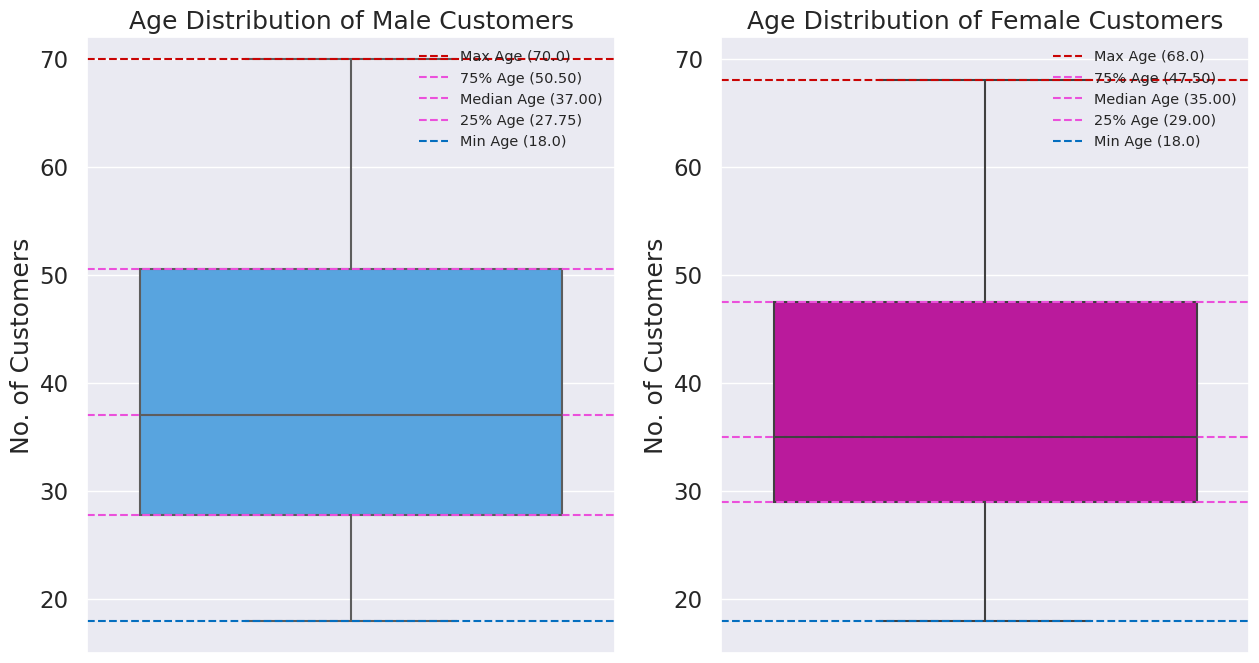

In [42]:
data_male = data[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

In [43]:
data[data['Gender']=='Male'].Age.mean()

39.80681818181818

In [44]:
data[data['Gender']=='Male'].Age.value_counts().head()


19    6
32    5
48    5
59    4
28    3
Name: Age, dtype: int64

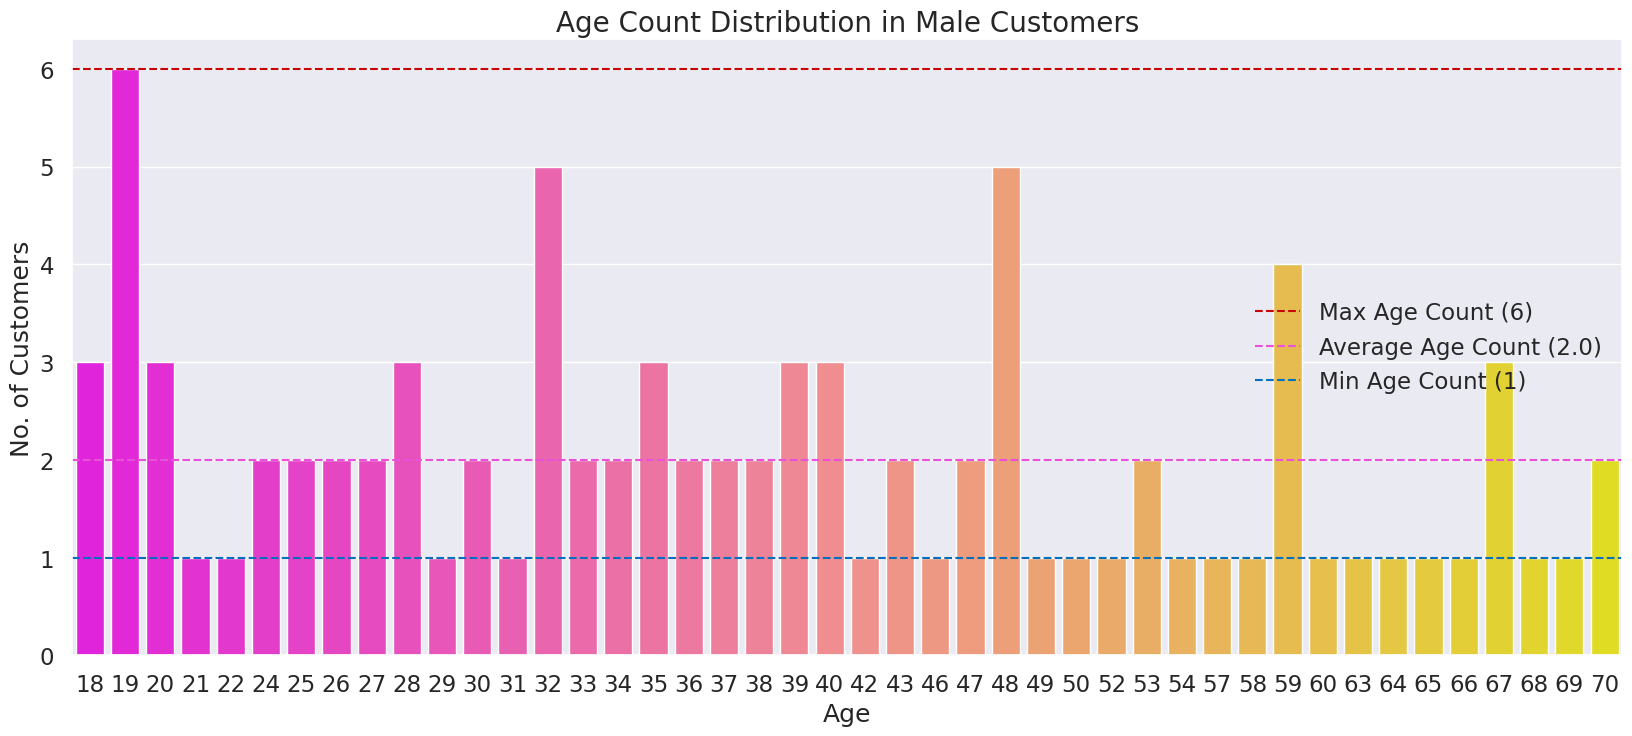

In [45]:

maxi = data[data['Gender']=='Male'].Age.value_counts().max()
mean = data[data['Gender']=='Male'].Age.value_counts().mean()
mini = data[data['Gender']=='Male'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Male'].Age, palette='spring')

ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')

ax.legend(loc ='right')

plt.title('Age Count Distribution in Male Customers', fontsize = 20)
plt.show()

In [46]:
#Average Age of Female Customers.

data[data['Gender']=='Female'].Age.mean()

38.098214285714285

In [48]:
#Counts of first five max age count in the Female Customers.

data[data['Gender']=='Female'].Age.value_counts().head()


31    7
23    6
49    6
32    6
35    6
Name: Age, dtype: int64

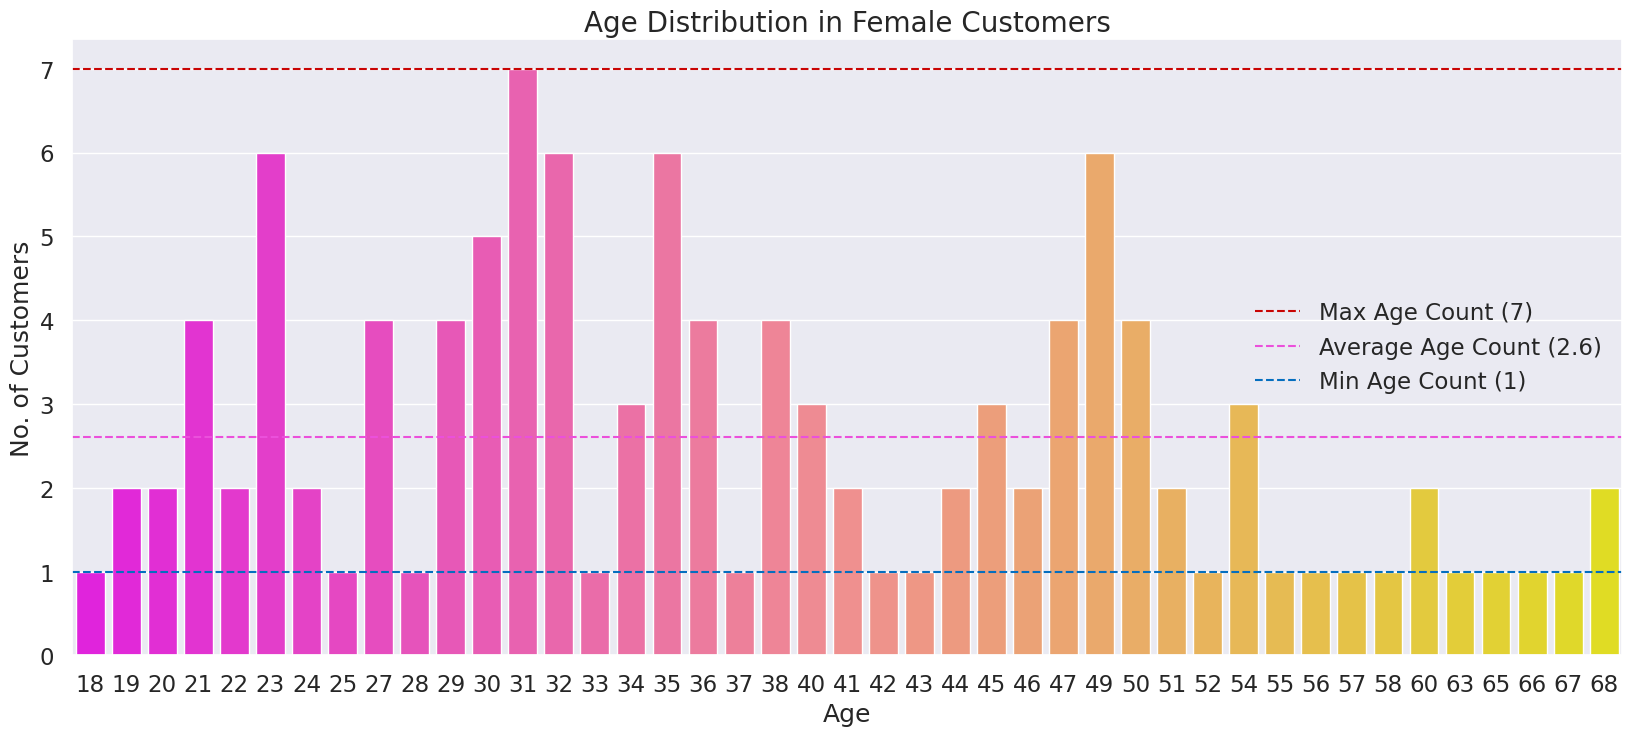

In [49]:
#Visualizing distribution of age count in Female customers using a countplot.

maxi = data[data['Gender']=='Female'].Age.value_counts().max()
mean = data[data['Gender']=='Female'].Age.value_counts().mean()
mini = data[data['Gender']=='Female'].Age.value_counts().min()


fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data[data['Gender']=='Female'].Age, palette='spring')
ax.axhline(y=maxi, linestyle='--',color='#c90404', label=f'Max Age Count ({maxi})')
ax.axhline(y=mean, linestyle='--',color='#eb50db', label=f'Average Age Count ({mean:.1f})')
ax.axhline(y=mini, linestyle='--',color='#046ebf', label=f'Min Age Count ({mini})')
ax.set_ylabel('No. of Customers')
ax.legend(loc ='right')

plt.title('Age Distribution in Female Customers', fontsize = 20)
plt.show()

# Analyzing Data for Modeling 

In [50]:
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

In [51]:
data['Annual_Income'].dtype

dtype('int64')

In [52]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

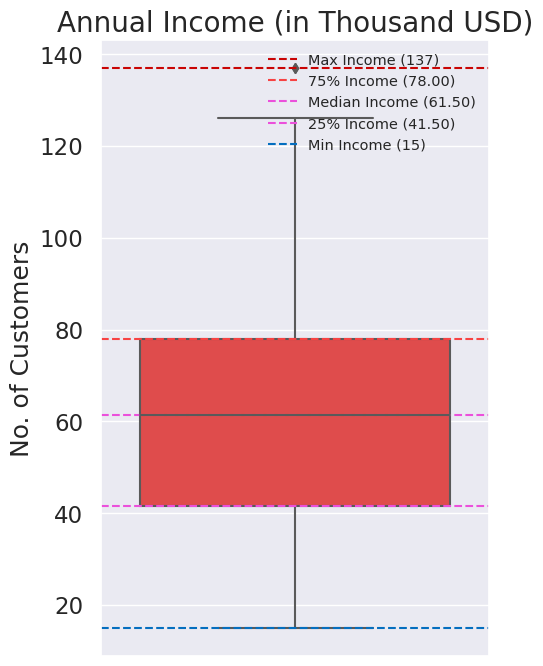

In [53]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

In [54]:
#Distribution of Annual Income counts.

data['Annual_Income'].value_counts().head()

54    12
78    12
48     6
71     6
63     6
Name: Annual_Income, dtype: int64

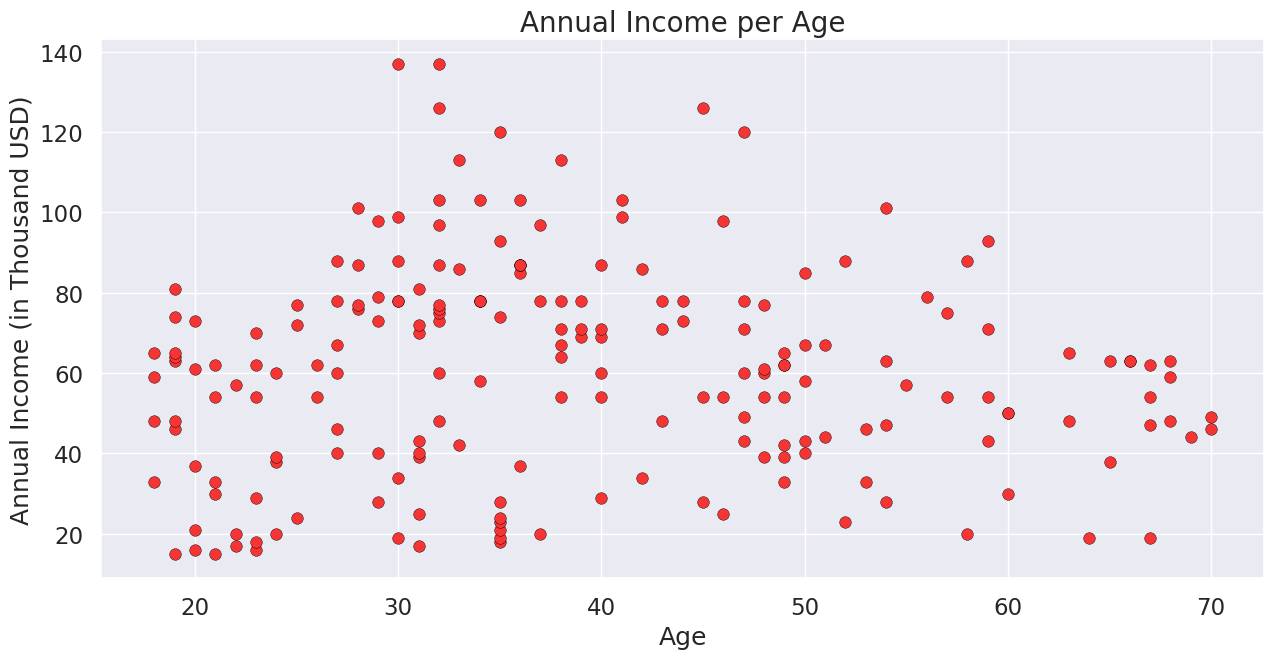

In [56]:
#Visualizing Annual Income per Age on a Scatterplot.

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

In [57]:
#Statistical data about the Annual Income of male customer.

data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [58]:
#Statistical data about the Annual Income of female customer.

data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

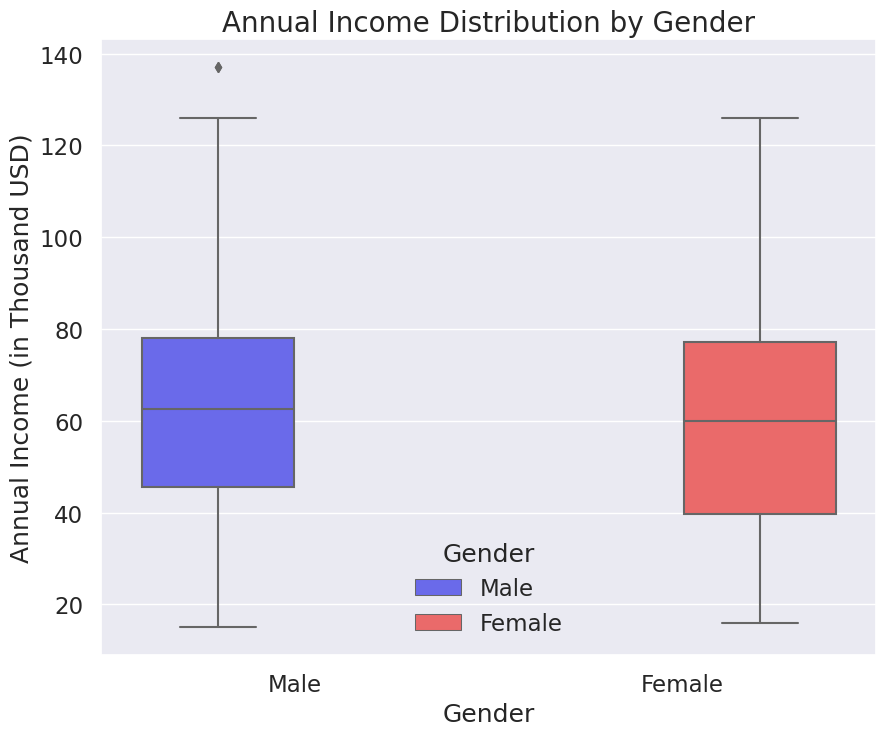

In [59]:
#Visualizing statistical difference of Annual Income between Male and Female Customers.

fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

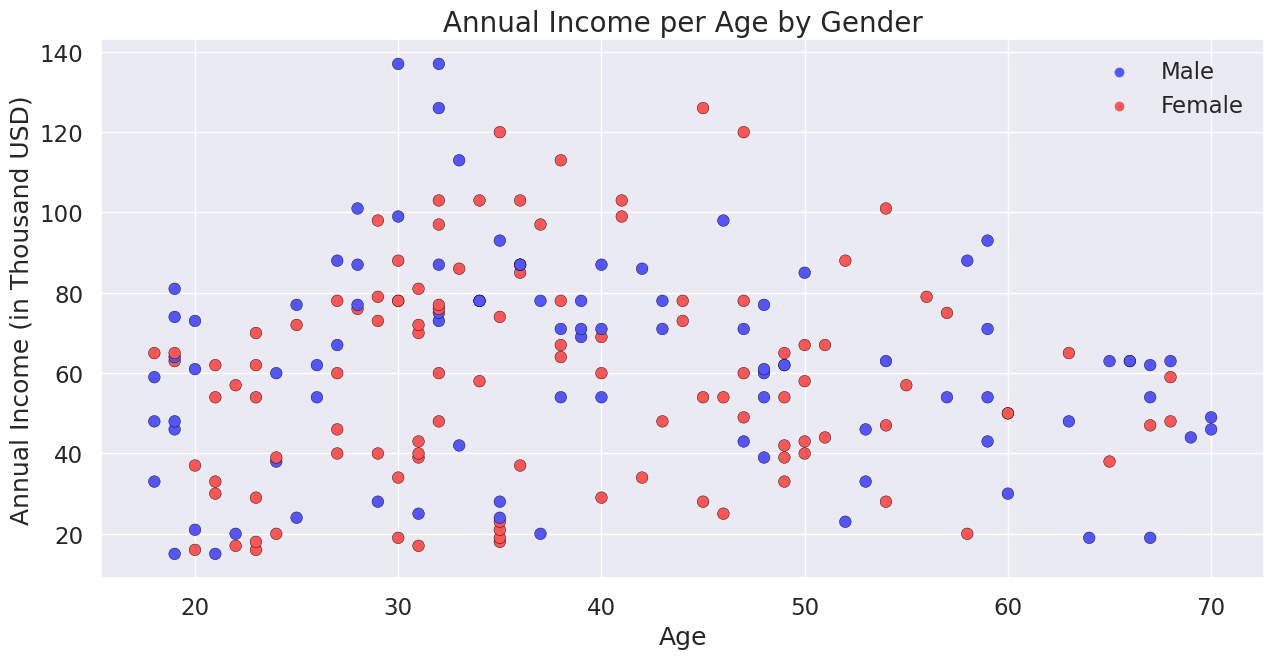

In [60]:
#Visualizing annual Income per Age by Gender on a scatterplot.

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

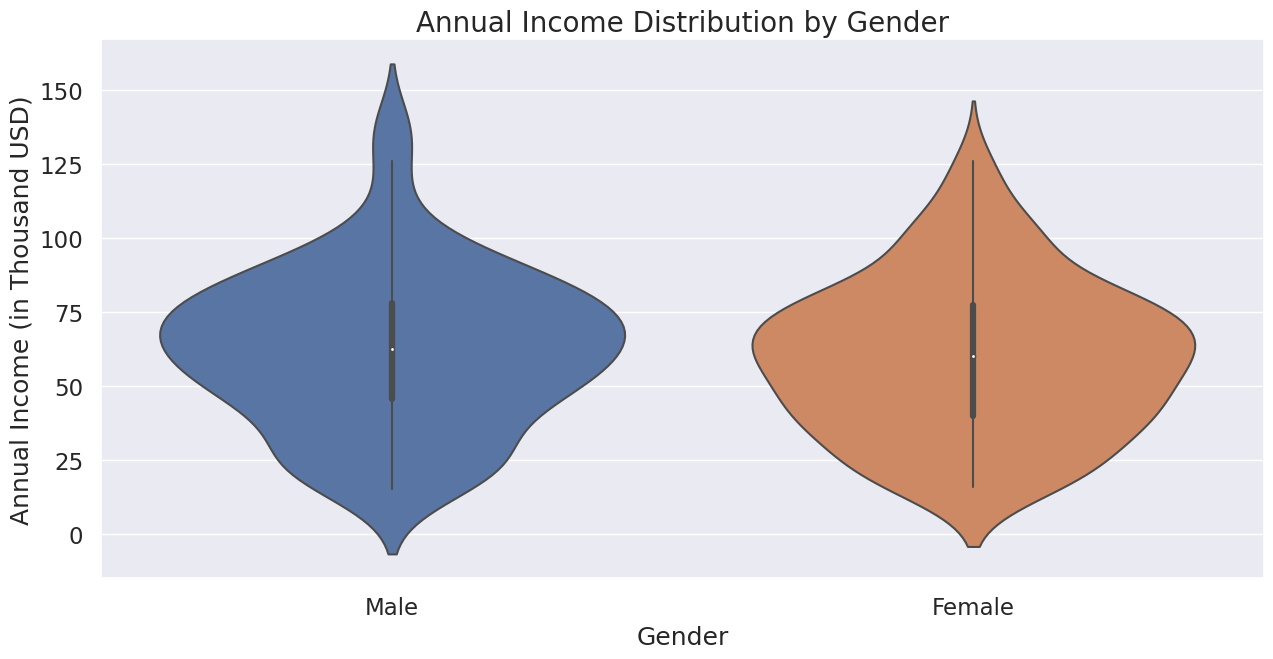

In [61]:
#Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

# K-Means Clustering

In [62]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


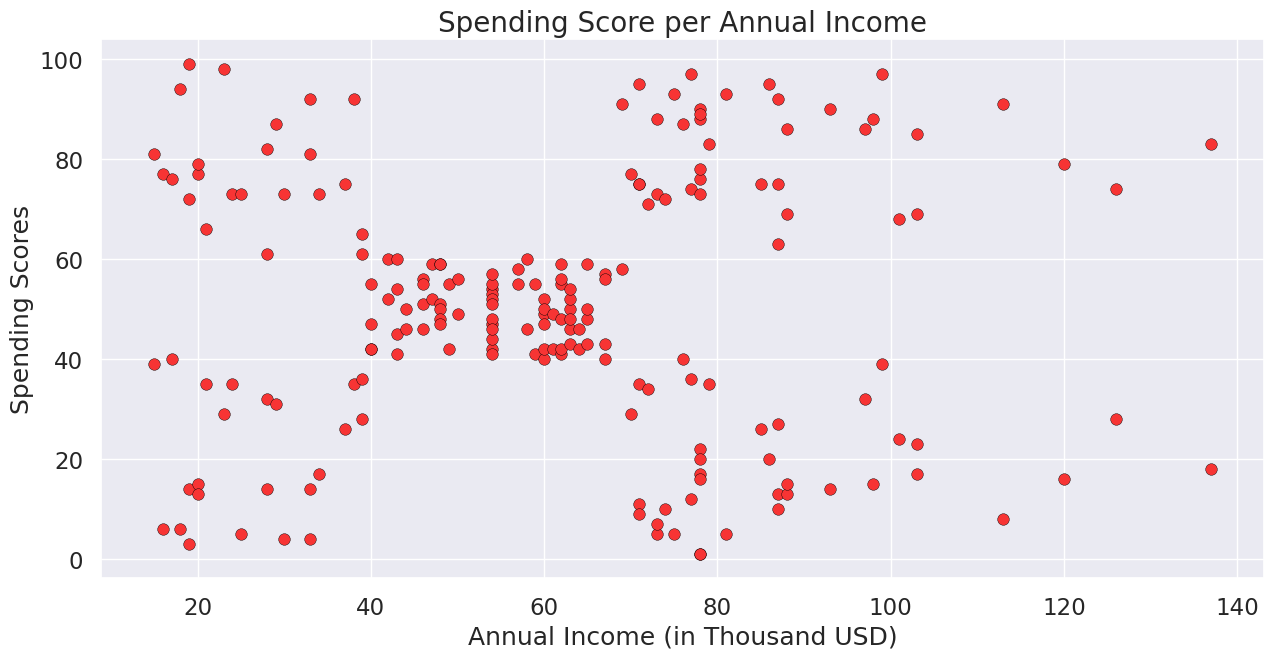

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

In [64]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30241.34361794,  25012.91706989,
        21862.09267218,  19664.68519601,  17894.72576111,  16131.99375602,
        14292.54382337,  13425.2583779 ,  12164.11771856,  10953.69546914,
         9869.22165914,   9746.3849958 ,   8989.78670733,   8113.44409993,
         7820.27893773,   7266.23026225,   7003.1823435 ,   6610.9377117 ,
         5985.97348014,   5799.78434343,   5495.12360067,   5291.43311688,
         4916.51804176])

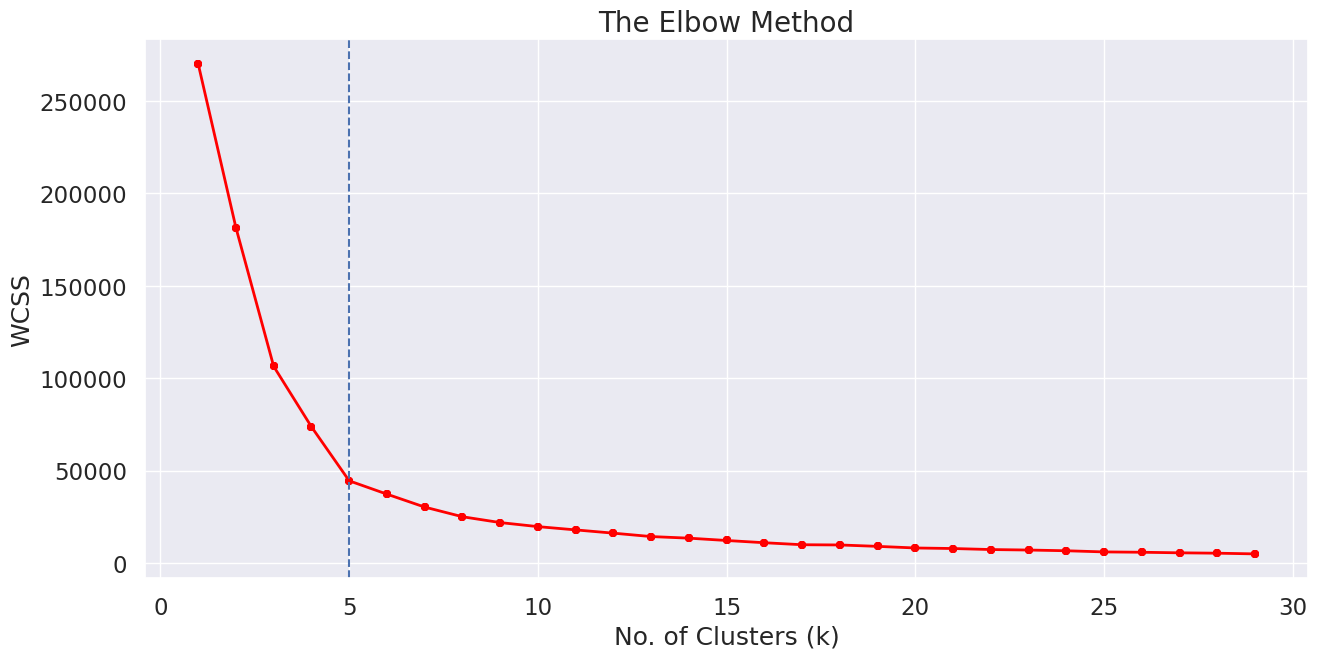

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [66]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [67]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

/home/chiku/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [68]:
kms.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

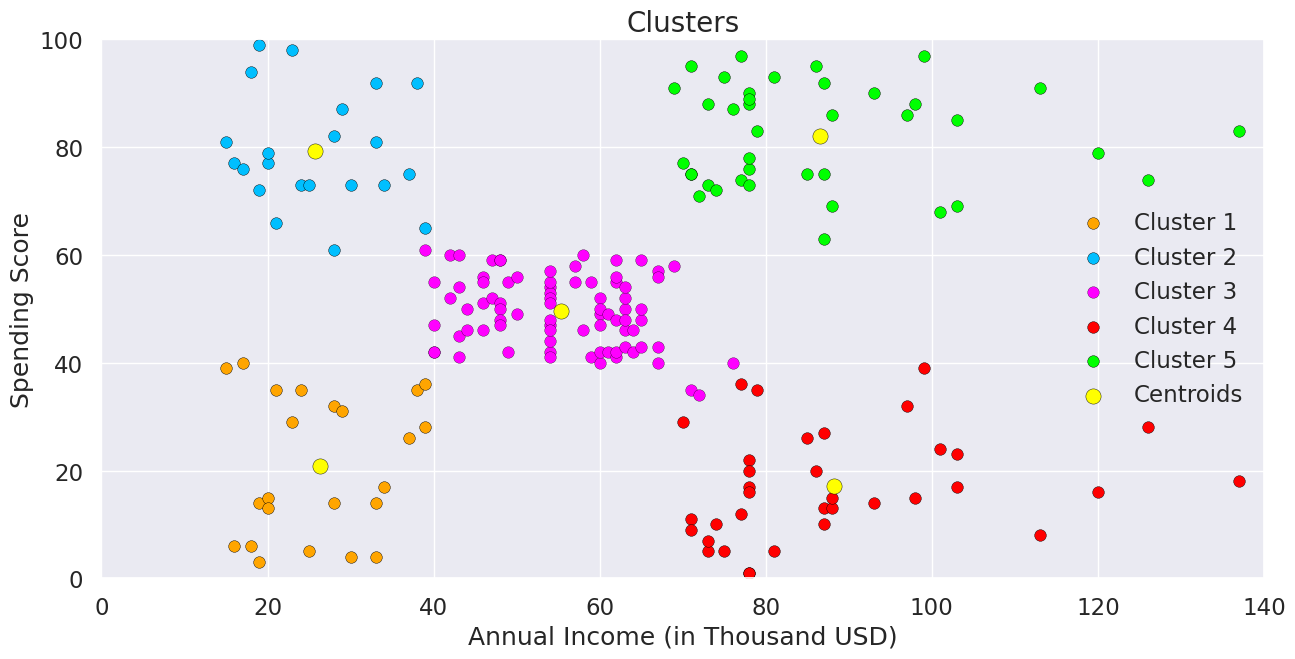

In [69]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()